In [1]:
library(tidyverse)
library(survival)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**(1) Consider a study carried out to evaluate the effect of a drug for high blood pressure. Elderly volunteers are randomly allocated to one of three treatments: a placebo, the drug that is currently most common, and the new drug that has been developed. The study lasts for ten years, and the event of interest is occurrence of any kind of heart disease, including death resulting from heart disease. Briefly describe a situation from this study that might lead to an observation that is right-censored.**

One typical type of right censoring in a case like this would be that a participant simply stops responding to questionnaires. It's hard to keep people to keep responding to surveys for 10 years, and they might just stop bothering to respond.

**(2) The lifetime of light bulbs follows an exponential distribution with hazard rate of 0.001 failures per hour of use. (a) Find the mean lifetime of a randomly selected light bulb. (b) Find the median lifetime of a randomly selected light bulb. (c) What is the probability of a light bulb will still function after 2000 hours of use?**

- If there are $0.001$ failures per hour, then there are $1/0.001 = 1000$ hours per failure. So, the mean lifetime is 1000.
- The formula for the median of the exponential distribution gives the median as $\ln(2) / 0.001 = 693.147180559945$
- The cdf of the exponential distribution is given by $1 - \exp(-\lambda x)$, so the probability of lasting linger than 2000 hours is given by $\exp(-0.001(2000)) = 0.135335283236613$

**(3) A survival time $T$ has its hazard function as $h(t) = 2t$. (1) Which parametric statistical distribution does the survival time follow (such as Exponental, Weibull, log-normal, etc.)? (2) Find the survival function and density function of $T$.**

The hazard function is given as a scaled power of time, so the distribution must be Weibull. The hazard function of the Weibull distribution is given by,

$$
h(t) = \lambda k t^{k - 1}
$$

So, $k = 2$ and $\lambda = 1$. We can substitute these into the formulas for the survival function and density function of the Weibull.

$$
S(t) = \exp(-\lambda t^k) = \exp(-t^2)
$$

$$
f(t) = \lambda k t^{k - 1} \exp(-\lambda t^k) = 2 t \exp(- t^2)
$$

**(4) Let $X$ be a random variable with $E(X) =\mu$ (mean) \& $Var(X) = \sigma^2$ (variance).**

**(a) Use Delta method to find mean and variance of $Y = g(X)$ \\(Hint: let $Y = g(X) = g(\mu) + (X - \mu) g'(\mu)$ based on Taylar expansion).**

Let $Y = g(x)$. Suppose $g$ is infinitely differentiable. Then, $Y$ can be represented using the Taylor series of $g$ about $E[X]$.

$$
Y = \sum_{k = 0}^\infty k!^{-1}g^{(k)}(\mu)(X - \mu)^k
$$

We can approximate $Y$ as a linear function using the first two terms of the series.

$$
Y \approx g(\mu) + (X - \mu)g'(\mu)
$$

Take the expectation.

$$
E[Y] \approx E[g(\mu) + (X - \mu)g'(\mu)]
$$

$$
E[Y] \approx E[g(\mu)] + E[g'(\mu)X] - E[g'(\mu)\mu]
$$

$$
E[Y] \approx g(\mu) + g'(\mu)E[X] - g'(\mu)\mu
$$

We have that $\mu = E[X]$.

$$
E[Y] \approx g(\mu) + g'(\mu)\mu - g'(\mu)\mu
$$

$$
E[Y] \approx g(\mu)
$$

Take the variance.

$$
Var[Y] \approx Var[g(\mu) + (X - \mu)g'(\mu)]
$$

$$
Var[Y] \approx Var[g(\mu) + Xg'(\mu) - \mu g'(\mu)]
$$

But, $\mu$ is a constant. So,

$$
Var[Y] \approx Var[Xg'(\mu)]
$$

$$
Var[Y] \approx Var[X](g'(\mu))^2
$$

$$
Var[Y] \approx \sigma^2 (g'(\mu))^2
$$

**(b) In a special case when $g$ takes a natural log-transformation, that is $Y = g(X) = ln(X)$, find $E(Y)$ and $Var(Y)$, assuming $\mu$ and $\sigma^2$ are given (they can be estimated from historical data, for example).**

If $g(X) = \ln(X)$, then $g'(X) = {1 \over X}$

$$
E[Y] \approx g(E[X]) = \ln(\mu)
$$

$$
Var[Y] \approx Var[X](g'(\mu))^2 = {\sigma^2 \over \mu^2}
$$

**(c) Recall $H(t) = - ln(S(t))$ in the course slides, please find a formula for the estimate of $\hat{Var(H(t))}$, assuming $\hat{Var(S(t))}$ is already obtained from Greenwood method (say).**

From,

$$
H(t) = -\ln(S(t))
$$

We obtain,

$$
Var(H(t)) = Var(-\ln(S(t)))
$$

$$
Var(H(t)) = Var(\ln(S(t)))
$$

Using the formula from part b we obtain.

$$
Var(H(t)) \approx {Var(S(t)) \over E[S(t)]^2}
$$

Take the MLE,

$$
\hat{Var(H(t))} \approx {\hat{Var(S(t))} \over \hat{E[S(t)]}^2}
$$

Kaplan Meier is asymptotically unbiasedish, so we can approximate,

$$
\hat{E[S(T)]} \approx \hat{S}(t)
$$

Giving,

$$
\hat{Var(H(t))} \approx {\hat{Var(S(t))} \over S(t)^2}
$$

**(d) Redo (b) and (c) for $Y= \exp(X)$.**

If $g(X) = \exp(X)$, then $g'(X) = \exp(X)$.

Then,

$$
E[Y] \approx g(E[X]) = \exp(\mu)
$$

$$
Var[Y] \approx Var[X](g'(E[X]))^2 = Var[X]\exp(E[X])^2
$$

$$
Var[Y] \approx \sigma^2\exp(2\mu)
$$

**(5) A modified example from the course notes (Page 60): the data of time to death ($t_i$) from severe viral disease are given as follows:**

**Steroid: 1(3), 1+, 4+, 5, 7, 8, 10, 10+, 12+, 16+(3)**

**Control: 1+, 2, 3(2), 3+, 5(2), 16+(8)**

**Define:**

**$D_i$ = Number of events (deaths) at time $t_i$**

**$S_i$ = Number that are known to have survived beyond $t_i$ (by convention: includes those censored at $t_i$)**

**$N_i$ = Number of `at risk' of being observed to die at time $t_i$, that is $N_i= S_i + D_i$**

**$h_i(t)$ = hazard function at time $t_i$**

**$H_i(t)$ = corresponding cumulative hazard**

**(a) For each treatment group, complete the following table with Kaplan-Meier estimator of survival function:**

| $i$ | $t_i$ | $N_i$ | $D_i$ | $S_i$ | $\hat{S_i(t)}$ | s.e.$(\hat{S_i(t)})$ | $\hat{H_i(t)}$ | s.e.$(\hat{H_i(t)})$ | $\hat{h_i(t)}$ |
|-----|-------|--------|--------|--------|------------------|-----------------------|------------------|-----------------------|------------------|
| 1   |       |        |        |        |                  |                       |                  |                       |                  |
| 2   |       |        |        |        |                  |                       |                  |                       |                  |
| .   | .     | .      | .      | .      | .                | .                     | .                | .                     | .                |
| k   |       |        |        |        |                  |                       |                  |                       |                  |


In [2]:
# the data from above
data = data.frame(
    time = c(1, 1, 1, 1, 4, 5, 7, 8, 10, 10, 12, 16, 16, 16, 1, 2, 3, 3, 3, 5, 5, rep(16, 8)),
    censored = c(0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, rep(1, 8)),
    treat = c(rep(1, 14), rep(0, 15))
)

head(data)

,time,censored,treat
,<dbl>,<dbl>,<dbl>
1,1,0,1
2,1,0,1
3,1,0,1
4,1,1,1
5,4,1,1
6,5,0,1


This function calculates the Kaplan Meier table for one of the groups. I use the formula from question 4 part c to calculate a standard error for the cumulative hazard rate.

In [3]:
km_table = function (data) {
    data %>%
        mutate(n_units = n()) %>%
        group_by(time) %>%
        summarize(
            D = sum(1 - censored),
            n_events = n(),
            n_units = first(n_units)
        ) %>%
        arrange(time) %>%
        mutate(
            N = n_units - lag(cumsum(n_events), n = 1, default = 0),
            S = N - D,
            h_hat = D/N,
            S_hat = cumprod(1 - h_hat),
            S_hat_se = S_hat*sqrt(cumsum(D/(N*(N - D)))),
            H_hat = -log(S_hat),
            H_hat_se = S_hat_se / S_hat # from the derivation above
        ) %>%
        select(time, N, D, S, S_hat, S_hat_se, H_hat, H_hat_se, h_hat)
}

treat_km = km_table(data %>% filter(treat == 1))
control_km = km_table(data %>% filter(treat == 0))

In [4]:
treat_km

time,N,D,S,S_hat,S_hat_se,H_hat,H_hat_se,h_hat
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14,3,11,0.7857143,0.1096642,0.2411621,0.1395726,0.2142857
4,10,0,10,0.7857143,0.1096642,0.2411621,0.1395726,0.0000000
5,9,1,8,0.6984127,0.1275811,0.3589451,0.1826730,0.1111111
7,8,1,7,0.6111111,0.1383145,0.4924765,0.2263328,0.1250000
8,7,1,6,0.5238095,0.1434856,0.6466272,0.2739271,0.1428571
10,6,1,5,0.4365079,0.1436963,0.8289487,0.3291951,0.1666667
12,4,0,4,0.4365079,0.1436963,0.8289487,0.3291951,0.0000000
16,3,0,3,0.4365079,0.1436963,0.8289487,0.3291951,0.0000000


In [5]:
control_km

time,N,D,S,S_hat,S_hat_se,H_hat,H_hat_se,h_hat
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15,0,15,1.0000000,0.00000000,0.00000000,0.00000000,0.00000000
2,14,1,13,0.9285714,0.06883029,0.07410797,0.07412493,0.07142857
3,13,2,11,0.7857143,0.10966421,0.24116206,0.13957263,0.15384615
5,10,2,8,0.6285714,0.13256826,0.46430561,0.21090405,0.20000000
16,8,0,8,0.6285714,0.13256826,0.46430561,0.21090405,0.00000000


**(b) Find 95\% confidence interval for log($S_i (t)$) at each time point in Table (a) (hint: you may use the result from Q4(b)) .**

We can calculate the standard error using the delta method formulas from above. Then, we turn this into a confidence interval.

In [6]:
km = treat_km

calc_log_S = function(km) {
    km %>%
        mutate(
            # the formulas from question 4
            log_S_hat = log(S_hat),
            log_S_hat_se = S_hat_se / S_hat,
            
            # turn these into a confidence interval
            log_S_hat_lower = log_S_hat - 1.96*log_S_hat_se,
            log_S_hat_upper = log_S_hat + 1.96*log_S_hat_se
        )
}

treat_km = calc_log_S(treat_km)
control_km = calc_log_S(control_km)

Point estimates, standard errors, and confidence intervals are shown for the log survival function for the treatment and control groups.

In [7]:
# treatment group
treat_km %>%
    select(time, log_S_hat, log_S_hat_se, log_S_hat_lower, log_S_hat_upper)

time,log_S_hat,log_S_hat_se,log_S_hat_lower,log_S_hat_upper
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.2411621,0.1395726,-0.5147244,0.0324003010
4,-0.2411621,0.1395726,-0.5147244,0.0324003010
5,-0.3589451,0.1826730,-0.7169841,-0.0009061013
7,-0.4924765,0.2263328,-0.9360888,-0.0488641327
8,-0.6466272,0.2739271,-1.1835243,-0.1097299812
10,-0.8289487,0.3291951,-1.4741711,-0.1837263421
12,-0.8289487,0.3291951,-1.4741711,-0.1837263421
16,-0.8289487,0.3291951,-1.4741711,-0.1837263421


In [8]:
# control group
control_km %>%
    select(time, log_S_hat, log_S_hat_se, log_S_hat_lower, log_S_hat_upper)

time,log_S_hat,log_S_hat_se,log_S_hat_lower,log_S_hat_upper
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00000000,0.00000000,0.0000000,0.00000000
2,-0.07410797,0.07412493,-0.2193928,0.07117689
3,-0.24116206,0.13957263,-0.5147244,0.03240030
5,-0.46430561,0.21090405,-0.8776776,-0.05093366
16,-0.46430561,0.21090405,-0.8776776,-0.05093366


**(c) Find 95\% confidence interval for $S_i (t)$ at each time point in Table (a) using the exponential transformation from (b).**

I'm going to interpret this as asking me to apply the exponential function to the bounds derived in the last question. This is the exponential of the log bounds, so this is a confidence interval around the value of the survival function for each group at each time point.

In [9]:
treat_km = treat_km %>%
    mutate(
        exp_log_S_hat_lower = exp(log_S_hat_lower),
        exp_log_S_hat_upper = exp(log_S_hat_upper)
    )

treat_km %>%
    select(time, S_hat, exp_log_S_hat_lower, exp_log_S_hat_upper)

time,S_hat,exp_log_S_hat_lower,exp_log_S_hat_upper
<dbl>,<dbl>,<dbl>,<dbl>
1,0.7857143,0.5976653,1.0329309
4,0.7857143,0.5976653,1.0329309
5,0.6984127,0.4882225,0.9990943
7,0.6111111,0.3921586,0.9523105
8,0.5238095,0.3061977,0.8960761
10,0.4365079,0.2289684,0.8321635
12,0.4365079,0.2289684,0.8321635
16,0.4365079,0.2289684,0.8321635


In [10]:
control_km = control_km %>%
    mutate(
        exp_log_S_hat_lower = exp(log_S_hat_lower),
        exp_log_S_hat_upper = exp(log_S_hat_upper)
    )

control_km %>%
    select(time, S_hat, exp_log_S_hat_lower, exp_log_S_hat_upper)

time,S_hat,exp_log_S_hat_lower,exp_log_S_hat_upper
<dbl>,<dbl>,<dbl>,<dbl>
1,1.0000000,1.0000000,1.0000000
2,0.9285714,0.8030062,1.0737712
3,0.7857143,0.5976653,1.0329309
5,0.6285714,0.4157473,0.9503417
16,0.6285714,0.4157473,0.9503417


**(d) For the Steroid group, assume that survival times are distributed according to a Weibull distribution with parameters $\lambda$ and $\gamma$, the hazard and survival functions can be written as**

$$
h(t) = \lambda \gamma t^{\gamma -1}
$$
$$
S(t) = e^{-\lambda t^{\gamma}}
$$

**(i) Write down the likelihood function for the Steroid data; (ii) Explain briefly how you might find the maximum-likelihood estimates of $\lambda$ and $\gamma$ (do not attempt to find them); (iii) (Bonus) find the maximum-likelihood estimates of $\lambda$ and $\gamma$.**

Let $X_i$ denote the time associated with the ith unit. Let $T_i$ be an indicator variable for whether the ith unit is censored. Let $C_i$ be an indicator variable for whether the ith unit is censored.

Let $f(x) = P(X = x | \lambda, \gamma)$ be the pdf of the Weibull distribution.

Then, we can write the likelihood for the treatment group as,

$$
L_T(\lambda, \gamma) = \prod_{i = 1}^n (f(X_i)^{1 - C_i}S(X_i)^{C_i})^{T_i}
$$

By the definition of the hazard function, we can write,

$$
h(x) = {f(x) \over S(x)}
$$

Then,

$$
f(x) = S(x)h(x)
$$

Then,

$$
L_T(\lambda, \gamma) = \prod_{i = 1}^n (h(X_i)^{1 - C_i}S(X_i))^{T_i}
$$

Substitute the parametric form of $h$ and $S$.

$$
L_T(\lambda, \gamma) = \prod_{i = 1}^n ((\lambda \gamma X_i^{\gamma -1})^{1 - C_i}\exp(-\lambda X_i^{\gamma}))^{T_i}
$$

To find the maximum likelihood, we could take the derivative of the log likelihood, set this to zero, and solve for $\lambda$ and $\gamma$.

**(e) Plot Kaplan-Meier survival curve (using either R or SAS) for each group. Can you assume the survival time follows Weibull distribution and why?**

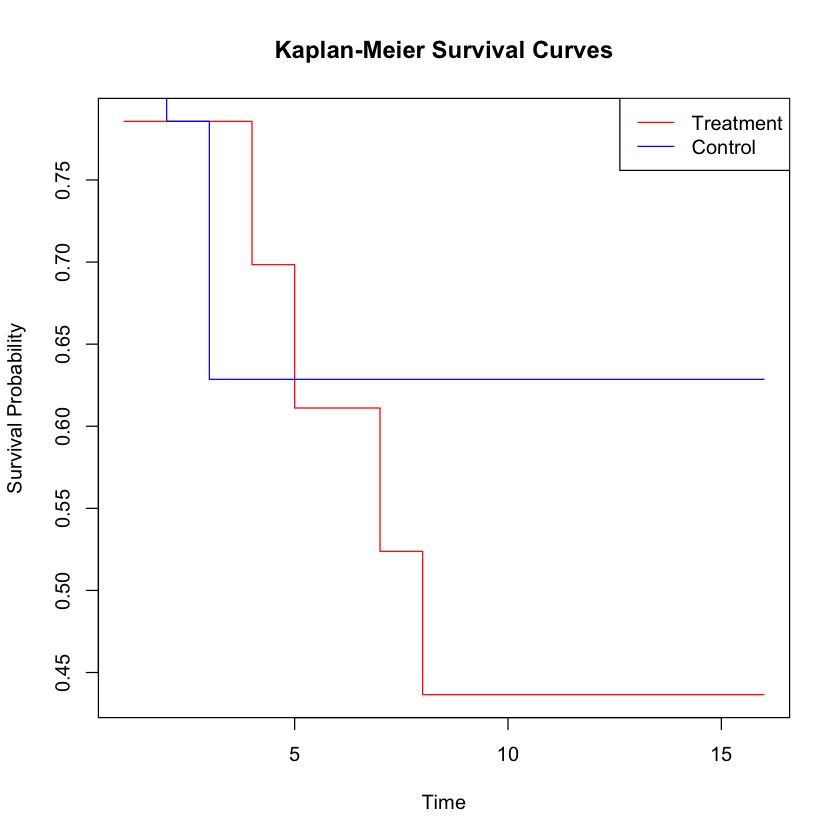

In [11]:
par(bg="white")
plot(treat_km$time, treat_km$S_hat, type="S", col="red", 
     xlab="Time", ylab="Survival Probability",
     main="Kaplan-Meier Survival Curves")
lines(control_km$time, control_km$S_hat, type="S", col="blue")
legend("topright", legend=c("Treatment", "Control"), 
       col=c("red", "blue"), lty=1)

Yes, it would be reasonable to model these using a Weibull distribution. A Weibull distribution is similar to an exponential distribution except that instead of the hazard rate being constant, it's a scaled power of time. This distribution has the right support---it will only predict positive numbers for survival time. And, it has a nice interpretation in terms of survival analysis---hazard rate is modeled as following a scaled power, which can be thought of as modeling "aging", where the instantaneous probability of death is rising or falling over time.

All models, especially parametric models, are wrong. But, for survival datasets, the Weibull is often a good choice.

**(f) Find a p-value from log-rank test between two groups by hand (by yourself). Double-check the result with SAS or R function. Please state the null and alternative hypotheses.**

In [12]:
treat_km %>%
    select(time, D, N) %>%
    full_join(
        control_km %>%
            select(time, D, N),
        by="time",
        suffix = c("_treat", "_control")
    ) %>%
    mutate(
        across(c(D_treat, D_control), ~replace_na(., 0))
    ) %>%
    arrange(time) %>%
    fill(N_treat, N_control, .direction="down") %>%
    mutate(
        D_total = D_treat + D_control,
        N_total = N_treat + N_control,
        E_treat = (N_treat / N_total) * D_total,
        V = N_treat*N_control*D_total*(N_total-D_total)/(N_total^2*(N_total - 1)),
    ) %>%
    summarize(
        sum(D_treat),
        sum(E_treat),
        sum_resid_treat = sum(D_treat - E_treat),
        sum_V = sum(V)
    ) %>%
    mutate(
        test_statistic = sum_resid_treat/sqrt(sum_V),
        p_value = 2*pnorm(q = test_statistic, mean = 0, sd = 1, lower.tail = FALSE)
    )

sum(D_treat),sum(E_treat),sum_resid_treat,sum_V,test_statistic,p_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,5.637575,1.362425,2.814033,0.8121721,0.4166929


The null hypothesis here is that the survival functions are the same for the two groups, $S_T = S_C$. The alternate is that they are different, $S_T \ne S_C$. This test works under the assumption that the ratio between the two survival functions is constant. We got a p-value of 0.4166929, indicating that we cannot reject the null that the two groups have the same survival functions.

In [13]:
survdiff(
    Surv(time, status) ~ treat,
    data = data %>%
        mutate(status = 1 - censored)
)

Call:
survdiff(formula = Surv(time, status) ~ treat, data = data %>% 
    mutate(status = 1 - censored))

         N Observed Expected (O-E)^2/E (O-E)^2/V
treat=0 15        5     6.45     0.326     0.746
treat=1 14        7     5.55     0.378     0.746

 Chisq= 0.7  on 1 degrees of freedom, p= 0.4 

**(g) Estimate median survival time and its 95\% confidence interval for each group from SAS or R function first, and do it by hand (by yourself) late.**

In [14]:
fit = survfit(
    Surv(time, status) ~ treat,
    data = data %>%
        mutate(status = 1 - censored),
    conf.int = 0.95
)
quantile(fit, probs = 0.5)

,50
treat=0,NA
treat=1,10
,50
treat=0,5
treat=1,5
,50
treat=0,NA
treat=1,NA


So, the estimate of the median survival time is 10 for treatment and greater than 15 for control. The 95% lower bound is 5 for both groups. The 95% upper bound is greater than 15 for control and greater than 14 for treatment.

To calculate the median and confidence interval by hand, we can can just examine the log confidence intervals created earlier.

In [15]:
treat_km %>%
    select(time, S_hat, exp_log_S_hat_lower, exp_log_S_hat_upper)

time,S_hat,exp_log_S_hat_lower,exp_log_S_hat_upper
<dbl>,<dbl>,<dbl>,<dbl>
1,0.7857143,0.5976653,1.0329309
4,0.7857143,0.5976653,1.0329309
5,0.6984127,0.4882225,0.9990943
7,0.6111111,0.3921586,0.9523105
8,0.5238095,0.3061977,0.8960761
10,0.4365079,0.2289684,0.8321635
12,0.4365079,0.2289684,0.8321635
16,0.4365079,0.2289684,0.8321635


We can see that `S_hat` falls below 0.5 for the first time when `time` is 10, so this is our estimate of the median survival time for the treatment group. To get the confidence interval on the median, we just do the same procedure for the upper and lower confidence bounds. The lower confidence bound on S falls below 0.5 for the first time at 5, so this is our 95% lower confidence bound on the median survival time of the treatment group. The upper bound on S never falls below 0.5, so the 95% upper bound for the median survival time is greater than 16.

In [16]:
control_km %>%
    select(time, S_hat, exp_log_S_hat_lower, exp_log_S_hat_upper)

time,S_hat,exp_log_S_hat_lower,exp_log_S_hat_upper
<dbl>,<dbl>,<dbl>,<dbl>
1,1.0000000,1.0000000,1.0000000
2,0.9285714,0.8030062,1.0737712
3,0.7857143,0.5976653,1.0329309
5,0.6285714,0.4157473,0.9503417
16,0.6285714,0.4157473,0.9503417


We do the same procedure with control. Our point estimate of the median survival time is 5, and the 95% confidence interval is [5, >16].

**(h) Estimate the difference of median survivals (Control - Steroid) between two groups and its 95\% confidence interval (hint: you can make reasonable assumptions (parametric model or non-parametric model), and use all methods you have learnt such as MLE, Delta method, Bayesian method, bootstraping,..., etc).**


I'm going to assume survival times are exponentially distributed. This isn't a great model for the data, but it's reasonable, and there's so little data here that it probably makes sense to use a simple model. I'll fit the exponential model with MLE for both treatment and control groups and take the difference in the 

In [17]:
n_boots = 100

diff_boots = numeric(n_boots)
median_treat = numeric(n_boots)
median_control = numeric(n_boots)

# bootstrap loop
for (i in 1:n_boots) {
    results = data %>%
        group_by(treat) %>%
        # resample the data
        slice_sample(
            prop = 1,
            replace = TRUE
        ) %>%
        summarize(
            # fit exponential model
            lambda_hat = sum(1 - censored) / sum(time)
        ) %>%
        mutate(
            # calculate median survival time for each group
            median_survival = log(2)/lambda_hat
        ) %>%
        select(treat, median_survival) %>%
        pivot_wider(
            names_from = treat,
            values_from = median_survival,
            names_prefix = "median_survival_"
        ) %>%
        # calculate the difference
        mutate(diff = median_survival_0 - median_survival_1)
    
    diff_boots[i] = results %>% pull(diff)
    median_control[i] = results %>% pull(median_survival_0)
    median_treat[i] = results %>% pull(median_survival_1)
}

boot_df = data.frame(
    diff_boots = diff_boots,
    median_control = median_control,
    median_treat = median_treat
)

head(boot_df)

,diff_boots,median_control,median_treat
,<dbl>,<dbl>,<dbl>
1,32.693442,43.43722,10.743781
2,21.834136,29.97862,8.144479
3,22.226920,41.35778,19.130862
4,11.743894,22.73523,10.991334
5,6.617905,14.44057,7.822661
6,13.108183,20.65579,7.547603


In [18]:
boot_df %>%
    pivot_longer(cols=everything(), names_to="statistic") %>%
    group_by(statistic) %>%
    summarize(
        median(value),
        quantile(value, probs=c(0.025)),
        quantile(value, probs=c(0.975))
    )

statistic,median(value),"quantile(value, probs = c(0.025))","quantile(value, probs = c(0.975))"
<chr>,<dbl>,<dbl>,<dbl>
diff_boots,8.389969,-10.924866,53.32612
median_control,20.794415,8.387081,65.15583
median_treat,10.353886,5.678175,32.49127


So, we estimate that that the control group has a median lifetime 10.70967 units longer than treatment, with a 95% confidence interval [-13.924110, 79.41177].

Interestingly, it appears that the exponential model forecasts longer lifetimes than the nonparametric analysis earlier. It is possible that this is biasing our estimate of the difference in some way, so if we were doing this in the wild we would probably want to compare this estimate to some other estimate.

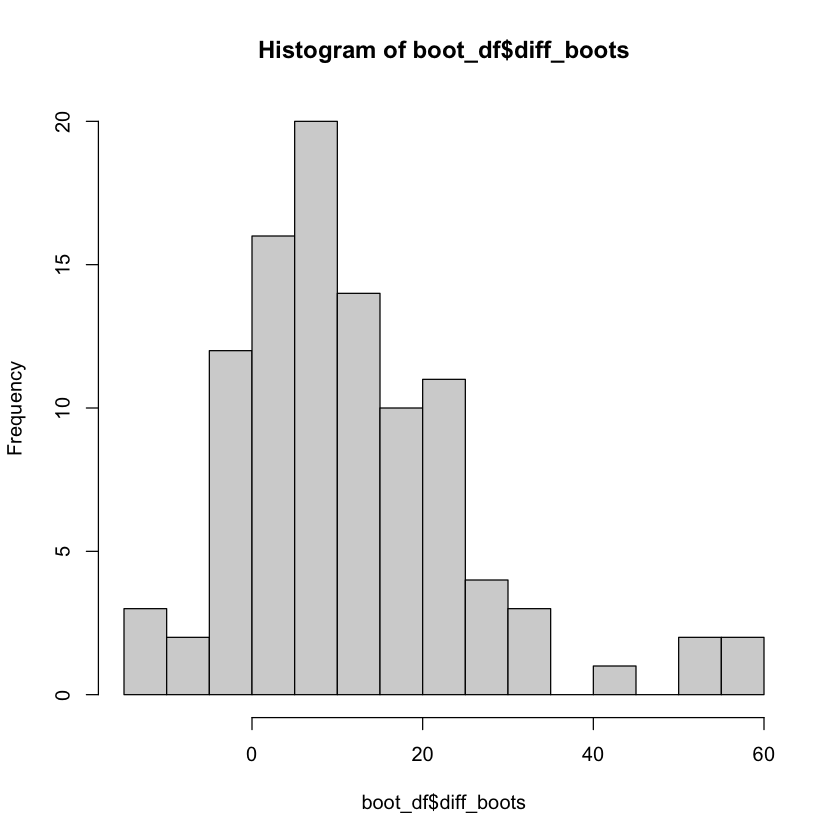

In [19]:
hist(x = boot_df$diff_boots, breaks = 20)